    x          y
0  77  79.775152
1  21  23.177279
2  22  25.609262
3  20  17.857388
4  36  41.849864

Missing values:
 x    0
y    0
dtype: int64

Degree-wise Performance:

   Degree  Train_MAE  Test_MAE  Train_MSE  Test_MSE  Train_RMSE  Test_RMSE  \
0       1   2.387322  2.517802   9.145302  9.259411    3.024120   3.042928   
1       2   2.384976  2.528828   9.142566  9.320062    3.023668   3.052878   
2       3   2.386012  2.539789   9.140254  9.412681    3.023285   3.068009   
3       4   2.391031  2.550959   9.125999  9.381379    3.020927   3.062904   
4       5   2.392217  2.566758   9.102792  9.466293    3.017083   3.076734   
5       6   2.366578  2.566063   8.980499  9.855745    2.996748   3.139386   

   Train_R2   Test_R2  
0  0.988547  0.990887  
1  0.988550  0.990828  
2  0.988553  0.990736  
3  0.988571  0.990767  
4  0.988600  0.990684  
5  0.988753  0.990300  


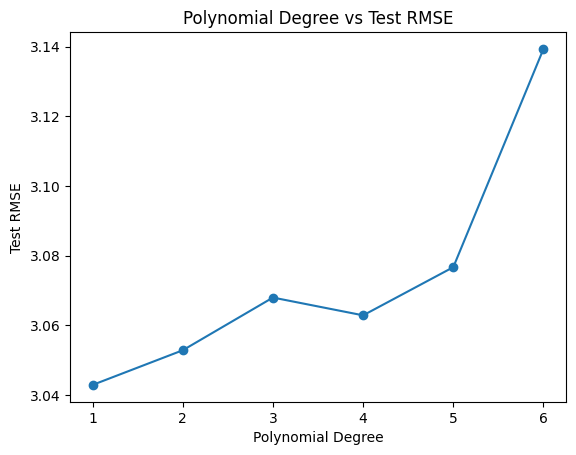

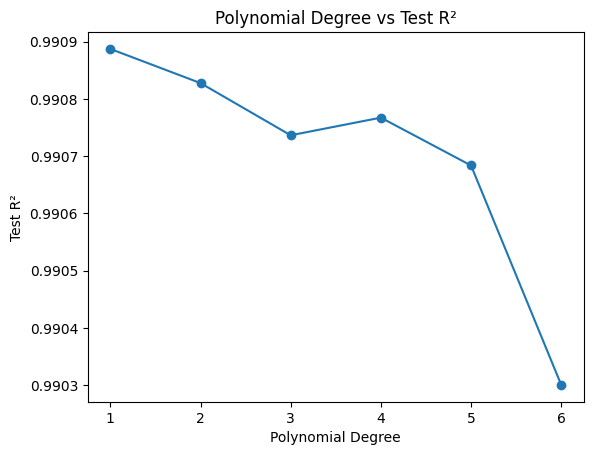


Best Polynomial Degree: 1


c:\Users\Kartik Patel\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


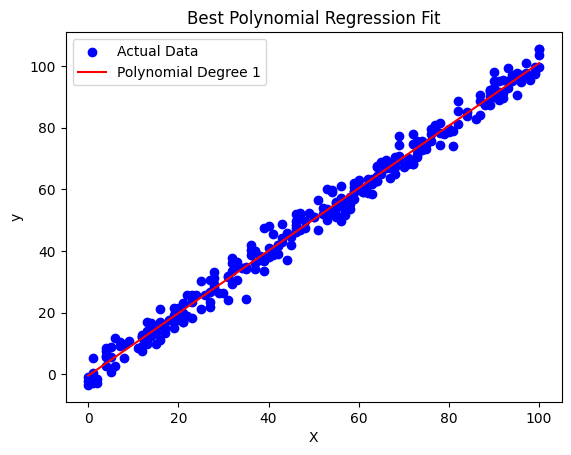

In [3]:
# Polynomial Regression with Error Metrics and Degree Analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# -----------------------------
# Load and clean dataset
# -----------------------------
data = pd.read_csv("test.csv")
data = data.dropna()

# Preview and check missing values
print(data.head())
print("\nMissing values:\n", data.isnull().sum())

# -----------------------------
# Select features and target
# -----------------------------
# Assumption: first column = feature, second column = target
X = data.iloc[:, 0:1]   # 2D DataFrame
y = data.iloc[:, 1]     # 1D Series

# -----------------------------
# Train-test split (same split for all degrees)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# Polynomial degrees to test
# -----------------------------
degrees = range(1, 7)

results = []

# -----------------------------
# Train and evaluate for each degree
# -----------------------------
for d in degrees:
    poly = PolynomialFeatures(degree=d)

    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    results.append({
        "Degree": d,
        "Train_MAE": mean_absolute_error(y_train, y_train_pred),
        "Test_MAE": mean_absolute_error(y_test, y_test_pred),
        "Train_MSE": mean_squared_error(y_train, y_train_pred),
        "Test_MSE": mean_squared_error(y_test, y_test_pred),
        "Train_RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "Test_RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
        "Train_R2": r2_score(y_train, y_train_pred),
        "Test_R2": r2_score(y_test, y_test_pred)
    })

# -----------------------------
# Results table
# -----------------------------
results_df = pd.DataFrame(results)
print("\nDegree-wise Performance:\n")
print(results_df)

# -----------------------------
# Plots: Degree vs RMSE and R2
# -----------------------------
plt.figure()
plt.plot(results_df["Degree"], results_df["Test_RMSE"], marker="o")
plt.xlabel("Polynomial Degree")
plt.ylabel("Test RMSE")
plt.title("Polynomial Degree vs Test RMSE")
plt.show()

plt.figure()
plt.plot(results_df["Degree"], results_df["Test_R2"], marker="o")
plt.xlabel("Polynomial Degree")
plt.ylabel("Test R²")
plt.title("Polynomial Degree vs Test R²")
plt.show()

# -----------------------------
# Select best degree (highest Test R2)
# -----------------------------
best_degree = results_df.loc[results_df["Test_R2"].idxmax(), "Degree"]
print("\nBest Polynomial Degree:", best_degree)

# -----------------------------
# Retrain model with best degree
# -----------------------------
poly_best = PolynomialFeatures(degree=int(best_degree))
X_poly = poly_best.fit_transform(X)

model_best = LinearRegression()
model_best.fit(X_poly, y)

# Smooth curve preparation
X_sorted = np.sort(X.values, axis=0)
X_sorted_poly = poly_best.transform(X_sorted)
y_sorted_pred = model_best.predict(X_sorted_poly)

# -----------------------------
# Final Plot: Actual vs Best Fit
# -----------------------------
plt.figure()
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X_sorted, y_sorted_pred, color="red", label=f"Polynomial Degree {best_degree}")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Best Polynomial Regression Fit")
plt.legend()
plt.show()


# New section